### Import packages

In [2]:
!pip install colour-science

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import seaborn as sns
from sklearn.cluster import KMeans

#pip install colour-science
from colour.plotting import *

sns.set()
import math

# from jqmcvi import base

# import nltk
# nltk.download('wordnet')
# from nltk.corpus import wordnet as wn

## Data sources and preprocessing

In [4]:
pantone_hex = pd.read_excel('Pantone_hex.xlsx').drop(columns='Colour').rename(columns={"#Hex": "Hex"})
prods = pd.read_csv('csv_files/candles.csv')
colours = pd.read_csv('csv_files/colours.csv')
frag = pd.read_csv('csv_files/fragrances.csv')

In [10]:
len(prods.product_name.unique())

240

In [11]:
prods.product_name.unique()

array(['Cookies & Cream', 'Creamy Vanilla', 'Happy Birthday',
       'Passion Fruit', 'Pink Cherry', 'Sweet Cupcake',
       'Pomegranate Lemonade', 'Wild Flowers', 'Mango Melon Smoothie',
       'True Love', 'Lime Mint Sorbet', 'Fruity Watermelon',
       'Marshmallow Fondue', 'Blueberry Pancakes', 'Sweet Angel',
       'Speculoos Cookies', 'Winter Wonderland', 'Pistacio Macarons',
       'Cinnamon Orange', 'Keep Calm & Relax', 'Good Luck',
       'My Favorite Person', 'Fluffy Cotton', 'Raspberry Yoghurt',
       'French Lavender', 'Fruity Smoothie', 'Happy Summer',
       'Lilac & Jasmine', 'Tropical Peach', 'Monoi de Tahiti',
       'Mulled Wine', 'Weihnachts-Kuschel', 'Iced Blossom',
       'Crispy Popcorn', 'Amaretto Waffel', 'Toffee Delight', 'Rain Drops',
       'Maple Syrup', 'Snowflakes', 'Roasted Coffee', 'Mousse au Chocolat',
       'Vanilla Dreams', 'Christmas Cookies', 'Just Fabulous',
       'Forget Me Not', 'Candy Cane', 'Fresh Lemonade',
       'Bella, capricieuse, cute

In [116]:
pantone_hex

,Pantone,Hex,hue,saturation,lightness,hue_group,hue_sub_group,lightness_group,saturation_group
0,YellowC,FEDD00,52,100,50,Oranges,O3,3,1
1,Yellow 012C,FFD700,51,100,50,Oranges,O3,3,1
2,Orange 021C,FE5000,19,100,50,Reds,R2,3,1
3,Warm RedC,F9423A,3,94,60,Reds,R1,2,1
4,Red 032C,EF3340,356,85,57,Magenta-Reds,MR3,3,1
...,...,...,...,...,...,...,...,...,...
1336,Black 3C,212721,120,8,14,Greens,G1,5,5
1337,Black 4C,31261D,27,26,15,Reds,R3,5,4
1338,Black 5C,3E2B2E,351,18,21,Magenta-Reds,MR3,4,5
1339,Black 6C,101820,210,33,9,Cyan-Blues,CB1,5,4


In [5]:
frag.columns = ['smell_code', 'smell_group', 'smell_subgroup', 'smell_head',
                'smell_heart', 'smell_base', 'smell_percentage']
frag = frag[['smell_code', 'smell_group', 'smell_subgroup',
             'smell_head','smell_heart', 'smell_base']]

In [6]:
frag

,smell_code,smell_group,smell_subgroup,smell_head,smell_heart,smell_base
0,AR309941,Oriental,Gourmand,"coconut, almond","gourmande, sweet, chocolate",vanilla
1,AR452415,Floral,Floriental,"hot pink pepper, strawberry and cassis","heady tuberose, jasmine, white lily whilst","Patchouli, vanilla, precious musk"
2,AR289591,Oriental,Floriental,"coconut, milk",Jasmin,"vanilla, caramelized sugar"
3,AL223556,Fresh,Fruity,"Citrus, Orange, Bergamot","Citrus, Green Mango, Sea Salt","Sea Kelp, Floral, Amber"
4,AL223563,Fresh,Flowery,"Lavender, Moss","Sea Minerals, Bergamot","Sandalwood, Amber"
...,...,...,...,...,...,...
225,GG3021,Floral,Floral,"Neroli, Ylang","White GARDENIA, ORANGE FLOWER, frangipani, mon...","Musk, coconut, carnation, milky"
226,19-0001502,Floral,Floral,"Fresh, Bitter Orange, Bergamot","Orange blossom, Jasmine, Patchouli","White Musk, Vanilla, Amber"
227,PRX022406,Tasty,Sweet,Cinnamon,Milk Caramelised Sugar,"Vanilla, Benzoin Resinoid"
228,GG2698,Powdrey,Milky,Hint of lemon,"cupcake, buttercream icing, nutme","Vanilla, warm musk"


## Colour categorization

In [4]:
prods.head()

,sku,product_name,edition,season,colour_pantone,smell_code
0,10101DE,Cookies & Cream,classic,all_year,7506C,18123F
1,10101DE-L,Cookies & Cream,classic,all_year,7506C,18123F
2,10101DE-M,Cookies & Cream,classic,all_year,7506C,18123F
3,10101DE-S,Cookies & Cream,classic,all_year,7506C,18123F
4,10101FR,Cookies & Cream,classic,all_year,7506C,18123F


In [5]:
colours.head()

,pantone,hex,munsell_hue,munsell_value,munsell_chroma,name
0,7499C,F1E6B2,10Y,9,4,Light Yellow
1,2587C,8246AF,2.5P,4,14,Dark Purple
2,357C,215732,10GY,3,6,Green
3,204C,E782A9,7.5RP,6,10,Light Pink
4,2635C,C5B4E3,2.5P,7,6,Light Purple


In [200]:
_hex = '#123450'
print('Hex Value -', _hex,'\n\n RGB Values\n'\
      'Red -', hex_to_rgb(_hex)[0]*255, \
      ', Blue -', hex_to_rgb(_hex)[1]*255, \
      ', Green -', hex_to_rgb(_hex)[2]*255, \
      '\n\n HSL Values\n'\
      'Hue -',round(rgb_to_hsl(hex_to_rgb(_hex)[0], hex_to_rgb(_hex)[1], hex_to_rgb(_hex)[2])[0]*360),\
      ', Saturation -',round(rgb_to_hsl(hex_to_rgb(_hex)[0], hex_to_rgb(_hex)[1], hex_to_rgb(_hex)[2])[1]*100),\
      ', Lightness -',round(rgb_to_hsl(hex_to_rgb(_hex)[0], hex_to_rgb(_hex)[1], hex_to_rgb(_hex)[2])[2]*100)
     )

Hex Value - #123450 

 RGB Values
Red - 18.0 , Blue - 52.0 , Green - 80.0 

 HSL Values
Hue - 207 , Saturation - 63 , Lightness - 19


In [7]:
# Function to convert hex values to RGB values

def hex_to_rgb(hex_value):
    h = str(hex_value).lstrip('#')
    return tuple(int(h[i:i + 2], 16) / 255.0 for i in (0, 2, 4))

In [8]:
# Function to plot colours from list of colour hexes

def colour_plot(colour_list):
    hex_colors  = col_hex.hex[(col_hex.name.isin(colour_list))].values.tolist()
    # '#9639' is an invalid hex
    rgb_colors = list(map(hex_to_rgb, hex_colors))
    #print(rgb_colors)
    sns.palplot(rgb_colors)

In [9]:
# Function to store colours with similar  names in a list
# Parameters: colour - name of the colour; list_name - name of the list to store the similar colours in .

def sim_colour(colour, list_name):
    list_name=[]
    for n in col_hex.name.unique().tolist():
        if colour in n:
            list_name.append(n)
    return list_name

In [10]:
# Function to convert RGB values to HSL values

def rgb_to_hsl(r, g, b):
    r = float(r)
    g = float(g)
    b = float(b)
    high = max(r, g, b)
    low = min(r, g, b)
    h, s, l = ((high + low) / 2,)*3

    if high == low:
        h = 0.0
        s = 0.0
    else:
        l = (high + low) / 2
        d = high - low
        s = d / (2 - high - low) if l > 0.5 else d / (high + low)
        h = {
            r: (g - b) / d + (6 if g < b else 0),
            g: (b - r) / d + 2,
            b: (r - g) / d + 4,
        }[high]
        h /= 6

    return h, s, l

In [11]:
# Calculate hue for each colour

# The use of pantone_hex dataset would not be needed as the hex values would be used directly from 
# the main dataset once available


hue=[]
saturation=[]
lightness=[]

for i in range(len(pantone_hex.Hex)):
    hue.append(
        round(
            rgb_to_hsl(
                hex_to_rgb(pantone_hex.Hex.astype(str)[i])[0], 
                hex_to_rgb(pantone_hex.Hex.astype(str)[i])[1], 
                hex_to_rgb(pantone_hex.Hex.astype(str)[i])[2])[0]*360)
    )

for i in range(len(pantone_hex.Hex)):
    saturation.append(
        round(
            rgb_to_hsl(
                hex_to_rgb(pantone_hex.Hex.astype(str)[i])[0], 
                hex_to_rgb(pantone_hex.Hex.astype(str)[i])[1], 
                hex_to_rgb(pantone_hex.Hex.astype(str)[i])[2])[1]*100)
    )
    
for i in range(len(pantone_hex.Hex)):
    lightness.append(
        round(
            rgb_to_hsl(
                hex_to_rgb(pantone_hex.Hex.astype(str)[i])[0], 
                hex_to_rgb(pantone_hex.Hex.astype(str)[i])[1], 
                hex_to_rgb(pantone_hex.Hex.astype(str)[i])[2])[2]*100)
    )    
    
pantone_hex['hue']=hue
pantone_hex['saturation']=saturation
pantone_hex['lightness']=lightness

In [12]:
# pantone_hex['hue']=hue
# pantone_hex['saturation']=saturation
# pantone_hex['lightness']=lightness

### Manual categorisation based on visual differences

In [13]:
# Define the major colour groups for each Hue

def hue_group(i):
    if   pantone_hex.hue[i] in range(330,361) : return 'Magenta-Reds'
    elif pantone_hex.hue[i] in range(300,330) : return 'Magentas'
    elif pantone_hex.hue[i] in range(270,300) : return 'Blue-Magentas'
    elif pantone_hex.hue[i] in range(240,270) : return 'Blues'
    elif pantone_hex.hue[i] in range(210,240) : return 'Cyan-Blues'
    elif pantone_hex.hue[i] in range(180,210) : return 'Cyans'
    elif pantone_hex.hue[i] in range(150,180) : return 'Greens-Cyans'
    elif pantone_hex.hue[i] in range(120,150) : return 'Greens'
    elif pantone_hex.hue[i] in range(90 ,120) : return 'Yellow-Greens'
    elif pantone_hex.hue[i] in range(60 , 90) : return 'Yellows'
    elif pantone_hex.hue[i] in range(30 , 60) : return 'Oranges'
    else: return 'Reds'

# Create list of colour groups
hg=[]
for i in range(len(pantone_hex.hue)):
    hg.append(hue_group(i))

# Add the colour groups to dataframe
pantone_hex['hue_group']=hg

In [14]:
# Splitting Hues into sub groups

def hue_sub_group(i):
	if pantone_hex.hue_group[i]=='Magenta-Reds' : 
		if pantone_hex.hue[i] in range(330,340): return('MR1')
		elif pantone_hex.hue[i] in range(340,350): return('MR2')
		else: return('MR3')
	elif pantone_hex.hue_group[i]=='Magentas' : 
		if pantone_hex.hue[i] in range(300,310): return('M1')
		elif pantone_hex.hue[i] in range(310,320): return('M2')
		else: return('M3')
	elif pantone_hex.hue_group[i]=='Blue-Magentas' : 
		if pantone_hex.hue[i] in range(270,280): return('BM1')
		elif pantone_hex.hue[i] in range(280,290): return('BM2')
		else: return('BM3')
	elif pantone_hex.hue_group[i]=='Blues' : 
		if pantone_hex.hue[i] in range(240,250): return('B1')
		elif pantone_hex.hue[i] in range(250,260): return('B2')
		else: return('B3')
	elif pantone_hex.hue_group[i]=='Cyan-Blues' : 
		if pantone_hex.hue[i] in range(210,220): return('CB1')
		elif pantone_hex.hue[i] in range(220,230): return('CB2')
		else: return('CB3')
	elif pantone_hex.hue_group[i]=='Cyans' : 
		if pantone_hex.hue[i] in range(180,190): return('C1')
		elif pantone_hex.hue[i] in range(190,200): return('C2')
		else: return('C3')        
	elif pantone_hex.hue_group[i]=='Greens-Cyans' : 
		if pantone_hex.hue[i] in range(150,160): return('GC1')
		elif pantone_hex.hue[i] in range(160,170): return('GC2')
		else: return('GC3')
	elif pantone_hex.hue_group[i]=='Greens' : 
		if pantone_hex.hue[i] in range(120,130): return('G1')
		elif pantone_hex.hue[i] in range(130,140): return('G2')
		else: return('G3')        
	elif pantone_hex.hue_group[i]=='Yellow-Greens' : 
		if pantone_hex.hue[i] in range(90,100): return('YG1')
		elif pantone_hex.hue[i] in range(100,110): return('YG2')
		else: return('YG3')
	elif pantone_hex.hue_group[i]=='Yellows' : 
		if pantone_hex.hue[i] in range(60,70): return('Y1')
		elif pantone_hex.hue[i] in range(70,80): return('Y2')
		else: return('Y3')        
	elif pantone_hex.hue_group[i]=='Oranges' : 
		if pantone_hex.hue[i] in range(30,40): return('O1')
		elif pantone_hex.hue[i] in range(40,50): return('O2')
		else: return('O3')
	else:
		if pantone_hex.hue[i] in range(10): return('R1')
		elif pantone_hex.hue[i] in range(10,20): return('R2')
		else: return('R3')
        

# Create list of hue sub groups
hsg=[]
for i in range(len(pantone_hex.hue)):
    hsg.append(hue_sub_group(i))

# Add the colour groups to dataframe
pantone_hex['hue_sub_group']=hsg

In [15]:
# Define the lightness groups for each Hue
# checking the index of descriptive string values did not give appropriate results, so switching to sequential tags

def lightness_group(i):
    if   pantone_hex.lightness[i]>=80 : return int(1)
    elif pantone_hex.lightness[i] in range(60 , 80) : return int(2)
    elif pantone_hex.lightness[i] in range(40 , 60) : return int(3)
    elif pantone_hex.lightness[i] in range(20 , 40) : return int(4)
    else: return int(5)

# Create list of colour groups
lg=[]
for i in range(len(pantone_hex.hue)):
    lg.append(lightness_group(i))

# Add the colour groups to dataframe
pantone_hex['lightness_group']=lg

In [16]:
# Define the saturation groups for each Hue
# checking the index of descriptive string values did not give appropriate results, so switching to sequential tags

def saturation_group(i):
    if   pantone_hex.saturation[i]>=80 : return int(1)
    elif pantone_hex.saturation[i] in range(60 , 80) : return int(2)
    elif pantone_hex.saturation[i] in range(40 , 60) : return int(3)
    elif pantone_hex.saturation[i] in range(20 , 40) : return int(4)
    else: return int(5)

# Create list of colour groups
sg=[]
for i in range(len(pantone_hex.hue)):
    sg.append(saturation_group(i))

# Add the colour groups to dataframe
pantone_hex['saturation_group']=sg

In [18]:
# Merging colour property groups with products

prods_new = pd.merge(prods, pantone_hex, left_on='colour_pantone', right_on='Pantone', how='left').drop(columns='Pantone')

In [19]:
prods_new.head()

,sku,product_name,edition,season,colour_pantone,smell_code,Hex,hue,saturation,lightness,hue_group,hue_sub_group,lightness_group,saturation_group
0,10101DE,Cookies & Cream,classic,all_year,7506C,18123F,EFDBB2,40.0,66.0,82.0,Oranges,O2,1.0,2.0
1,10101DE-L,Cookies & Cream,classic,all_year,7506C,18123F,EFDBB2,40.0,66.0,82.0,Oranges,O2,1.0,2.0
2,10101DE-M,Cookies & Cream,classic,all_year,7506C,18123F,EFDBB2,40.0,66.0,82.0,Oranges,O2,1.0,2.0
3,10101DE-S,Cookies & Cream,classic,all_year,7506C,18123F,EFDBB2,40.0,66.0,82.0,Oranges,O2,1.0,2.0
4,10101FR,Cookies & Cream,classic,all_year,7506C,18123F,EFDBB2,40.0,66.0,82.0,Oranges,O2,1.0,2.0


In [208]:
prods_new.columns

Index(['sku', 'product_name', 'edition', 'season', 'colour_pantone',
       'smell_code', 'Hex', 'hue', 'saturation', 'lightness', 'hue_group',
       'hue_sub_group', 'lightness_group', 'saturation_group'],
      dtype='object')

In [20]:
prods_new[['product_name', 'Hex', 'hue', 'saturation', 'lightness', 'hue_group',\
           'hue_sub_group', 'lightness_group', 'saturation_group']].head()

,product_name,Hex,hue,saturation,lightness,hue_group,hue_sub_group,lightness_group,saturation_group
0,Cookies & Cream,EFDBB2,40.0,66.0,82.0,Oranges,O2,1.0,2.0
1,Cookies & Cream,EFDBB2,40.0,66.0,82.0,Oranges,O2,1.0,2.0
2,Cookies & Cream,EFDBB2,40.0,66.0,82.0,Oranges,O2,1.0,2.0
3,Cookies & Cream,EFDBB2,40.0,66.0,82.0,Oranges,O2,1.0,2.0
4,Cookies & Cream,EFDBB2,40.0,66.0,82.0,Oranges,O2,1.0,2.0


### Euclidean distance formula


<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b48fad52918eb76d14c4f17973ae210f7c1a6312" alt="Euclidean distance formula" style="width: 500px;"/>

where p and q are 2 points on the same plane.

Here, the distance has to be calculated between two colours in the HSL space which is in a cylindrical format. And for doing so the angular values(Hue) need to be converted first.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/16/Hsl-hsv_models_b.svg" alt="Euclidean distance formula" style="width: 500px;"/>

In [21]:
# Calculate euclidean distance between 2 colours based on their Hue, Saturation and Lightness values. 
# Assuming the colour model lies within the same colour space.

def colour_dist(x, y):
    import numpy as np
    dist = np.sqrt((x['saturation']*np.cos(x['hue']) - y['saturation']*np.cos(y['hue']))**2 +\
    (x['saturation']*np.sin(x['hue']) - y['saturation']*np.sin(y['hue']))**2 +\
    (x['lightness'] - y['lightness'])**2)
    return dist

### Different methods of finding similar colours


#### Method 1

Here I am trying to directly compare the Hue, Saturation and Lightness values of a colour with another to check how close the colours are. This is done by slowly incresing the range of the HSL values within which the colours are compared. The top 5-10 colours are retrieved depending on the retreival from the HSL ranges.

#### Method 2

Here the distance between the colours are checked using the Euclidean distance formula. The top 5-10 colours based on the closeness to the primary colour is retrieved based on the distance calculated.

#### Method 3

Here the concept of L1 distance is used to check the distance between the colours since the colours lie within a cylindrical environment. The top 5-10 colours based on the closeness to the primary colour is retrieved based on the distance calculated.

In [22]:
### Method 1 -  filter based on Hue, Saturation and Lightness values of the colour

# Get list of similar looking candles based on colour parameters and main candle

def col_rec(candle, col_list, h1, h2, l1, l2, s1, s2):
    R = prods_new[col_list][(prods_new.product_name!=candle)
#                             &
#                         (
#                             prods_new.hue_group.isin(list(prods_new.hue_group[prods_new.product_name==candle].unique()))
#                         )
#                         &
                            &
                        (prods_new.hue.isin(list(range(int(prods_new.hue[prods_new.product_name==candle].unique())-h1, 
                                                       int(prods_new.hue[prods_new.product_name==candle].unique())+h2)
                                                ))
                        )&
                        (
                            (prods_new.lightness_group.isin(list(range
                                                (int(prods_new.lightness_group[prods_new.product_name==candle].unique())-l1,
                                                 int(prods_new.lightness_group[prods_new.product_name==candle].unique())+l2)
                            )))&
                            (prods_new.saturation_group.isin(list(range
                                                (int(prods_new.saturation_group[prods_new.product_name==candle].unique())-s1,
                                                 int(prods_new.saturation_group[prods_new.product_name==candle].unique())+s2)
                            ))))
                            ].drop_duplicates(subset ="product_name").sort_values(by=['hue']).reset_index(drop=True)
    return(R)

##=======================================================================================##
## Dynamically increase parameter values based on the number of recommended candles retreived
## Logic needs tweaking.

def M_1(candle, col_list, len_recc=5):
    #len_recc=5
    h1=1
    h2=2
    l1=1
    l2=2
    s1=1
    s2=2

    R1 = col_rec(candle, col_list, h1=h1, h2=h2, l1=l1, l2=l2, s1=s1, s2=s2)

    while len(R1)<len_recc:
        h1+=1
        h2+=1
    
### Add logic to increase range of lightness and saturation based if hue range increases after a set threshold
        if h1>5 & h2>5:
            l1=2
            l2=3
            s1=2
            s2=3
        elif h1>10 & h2>10:
            l1=3
            l2=4
            s1=3
            s2=4
    ##
    ##
    
        t1 = col_rec(candle, col_list, h1=h1, h2=h2, l1=l1, l2=l2, s1=s1, s2=s2).head(len_recc-len(R1))
        R1=R1.append(t1[~t1.product_name.isin(list(R1.product_name.unique()))]).reset_index(drop=True)
                #sort_values(by=['hue','saturation'], ascending=False).reset_index(drop=True)

    return(R1)

In [32]:
### Method 2 -  Euclidean distance between 2 colours based on Hue, Saturation and Lightness values of the colour

def euc_dist_recommend(candle, col_list):
    col_list_tmp = col_list.copy()
    
    # Main Candle
    
    x=prods_new[col_list_tmp][prods_new.product_name==candle].\
                drop_duplicates(subset ="product_name").sort_values\
                (by=['hue', 'saturation', 'lightness']).reset_index(drop=True)

#  get candles within set hue range for candles recommendation
    test_df = prods_new[col_list_tmp]\
                [(prods_new.product_name!=candle)&
                 (prods_new.hue.isin(
                     list(range(int(prods_new.hue[prods_new.product_name==candle].unique())-25, 
                                int(prods_new.hue[prods_new.product_name==candle].unique())+26
                               )
                         ) # Hue range has been preset so that the colour difference does not vary too much
                 ))&
                 (prods_new.hue.notna())
                ].drop_duplicates(subset ="product_name").sort_values(\
        by=['hue', 'saturation', 'lightness']).reset_index(drop=True)

    # Get list of recommended candles based on euclidean distance of colours
    
    rows_list = []   # Create empty list to add rows to later convert to pandas dataframe
    for p in test_df.product_name:
        
        dict1 = {}   # Create empty dictionary
        dict1.update({'product_name':list(test_df.product_name[test_df.product_name==p])[0],
                      'Hex':list(test_df.Hex[test_df.product_name==p])[0],
                      'hue':list(test_df.hue[test_df.product_name==p])[0],
                      'lightness':list(test_df.lightness[test_df.product_name==p])[0],
                      'saturation':list(test_df.saturation[test_df.product_name==p])[0],
                      'dist':list(round(colour_dist(x,test_df[test_df.product_name==p].reset_index(drop=True)),2))[0]
                    }) # Generate dictionary of products along with the calculated distance between the main product and the 
        rows_list.append(dict1) # Append the dictionary generated above into the empty list created previously
    col_list_tmp.append('dist') # Add new column name 'dist'
    df = pd.DataFrame(rows_list, columns=col_list_tmp).sort_values(by='dist').reset_index(drop=True)

    return df.head(10) # Number of products set to 10. Can be modified to incoporate dynamic values.

In [24]:
### Method 3 : L1 distance

# Function to calculate the L1 distance between two colours

def l1_dist(c1, c2):
    r1=prods_new.saturation[prods_new.product_name==c1].unique()[0]
    r2=prods_new.saturation[prods_new.product_name==c2].unique()[0]

    t1=prods_new.hue[prods_new.product_name==c1].unique()[0]
    t2=prods_new.hue[prods_new.product_name==c2].unique()[0]

    z1=prods_new.lightness[prods_new.product_name==c1].unique()[0]
    z2=prods_new.lightness[prods_new.product_name==c2].unique()[0]

    if (t2-t1)<180:
        T=(t2-t1)
    else:
        T=(360-t2)+t1

    R=abs(r2-r1)
    L=abs(z2-z1)

    c_dist = R +min(r2,r1) * math.radians(T)+L

    return(round(np.abs(c_dist),2))


##=============================================================##
## Function to give recommended candles based on L1 distance

def l1_dist_recom(candle, col_list):
    col_list_tmp = col_list.copy()
    
    # Main Candle
    
    x=prods_new[col_list_tmp][prods_new.product_name==candle].\
    drop_duplicates(subset ="product_name").sort_values\
    (by=['hue', 'saturation', 'lightness']).reset_index(drop=True)
    #  get candles within set hue range for candles recommendation
    test_df = prods_new[col_list_tmp]\
                [(prods_new.product_name!=candle)&
                 (prods_new.hue.isin(
#                      list(prods_new.hue.unique())
                     list(prods_new.hue.unique()
#                          range(int(prods_new.hue[prods_new.product_name==candle].unique())-25, 
#                                 int(prods_new.hue[prods_new.product_name==candle].unique())+26
#                                )
                         )
                 )
                 )&(prods_new.hue.notna())
                ].drop_duplicates(subset ="product_name").sort_values(\
        by=['hue', 'saturation', 'lightness']).reset_index(drop=True)
    
    # Get list of recommended candles based on euclidean distance of colours
    rows_list = []
    for p in test_df.product_name:
        #print(test_df[test_df.product_name==p].reset_index(drop=True))
        dict1 = {}
        dict1.update({'product_name':list(test_df.product_name[test_df.product_name==p])[0],
                      'Hex':list(test_df.Hex[test_df.product_name==p])[0],
                    'hue':list(test_df.hue[test_df.product_name==p])[0],
                    'lightness':list(test_df.lightness[test_df.product_name==p])[0],
                    'saturation':list(test_df.saturation[test_df.product_name==p])[0],
                    'dist':[round(l1_dist(x.product_name[0],p), 2)][0]
                    }) 
        rows_list.append(dict1)
    col_list_tmp.append('dist')
    df = pd.DataFrame(rows_list, columns=col_list_tmp).sort_values(by='dist').reset_index(drop=True)

    return df.head(10)

### Testing the 3 methods

In [25]:
candle="Toffee Delight"
col_list=['product_name', 'Hex','hue', 'lightness', 'saturation']

Original - 
      product_name     Hex   hue  lightness  saturation
0  Toffee Delight  E0E721  62.0       52.0        80.0
Recommendation
           product_name     Hex   hue  lightness  saturation
0        Fresh Lemonade  B7BF10  63.0       41.0        85.0
1          Happy Summer  E1E000  60.0       44.0       100.0
2         Passion Fruit  F3E500  57.0       48.0       100.0
3  Mango Melon Smoothie  FFB500  43.0       50.0       100.0
4           Magic Melon  FFB500  43.0       50.0       100.0
5           Sweet Angel  FFC845  42.0       64.0       100.0
6        Tropical Peach  FDD26E  42.0       71.0        97.0
7   You Are My Sunshine  FDD26E  42.0       71.0        97.0
8          Jingle Bells  CC8A00  41.0       40.0       100.0
9        Crispy Popcorn  FFBF3F  40.0       62.0       100.0


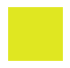

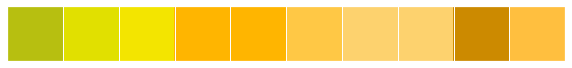

In [30]:
## Method 1 - Comparing colours by checking values of their colour properties.

method_1 = M_1(candle, col_list, len_recc=10)
print('Original - \n', prods_new[col_list][prods_new.product_name==candle].\
    drop_duplicates(subset ="product_name").sort_values\
    (by=['hue', 'saturation', 'lightness']).reset_index(drop=True)) 
sns.palplot(list(map(hex_to_rgb, prods_new.Hex[prods_new.product_name==candle].unique().tolist())))
print('Recommendation')
sns.palplot(list(map(hex_to_rgb, list(_recom_sort(method_1, candle).Hex))))
print(_recom_sort(method_1, candle))


## This method needs more tweaking in the logic.

Original - 
      product_name     Hex   hue  lightness  saturation
0  Toffee Delight  E0E721  62.0       52.0        80.0
Recommendation
           product_name     Hex   hue  lightness  saturation    dist
0        Fresh Lemonade  B7BF10  63.0       41.0        85.0   79.99
1         Passion Fruit  F3E500  57.0       48.0       100.0  108.98
2          Happy Easter  F1E6B2  50.0       82.0        69.0   52.39
3          Marzipan Joy  F1E6B2  50.0       82.0        69.0   52.39
4           Magic Melon  FFB500  43.0       50.0       100.0   24.18
5  Mango Melon Smoothie  FFB500  43.0       50.0       100.0   24.18
6        Pear Ice Cream  C4D6A4  82.0       74.0        38.0   76.46
7   You Are My Sunshine  FDD26E  42.0       71.0        97.0   99.18
8        Tropical Peach  FDD26E  42.0       71.0        97.0   99.18
9           Sweet Angel  FFC845  42.0       64.0       100.0  100.07


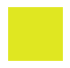

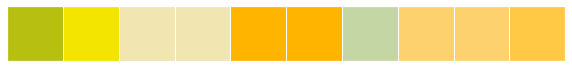

In [33]:
## Method 2 - Compare the euclidean distance between the candles

method_2 = euc_dist_recommend(candle, col_list)
# print(edr)
print('Original - \n', prods_new[col_list][prods_new.product_name==candle].\
    drop_duplicates(subset ="product_name").sort_values\
    (by=['hue', 'saturation', 'lightness']).reset_index(drop=True)) 
sns.palplot(list(map(hex_to_rgb, prods_new.Hex[prods_new.product_name==candle].unique().tolist())))
print('Recommendation')
sns.palplot(list(map(hex_to_rgb, list(_recom_sort(method_2, candle).Hex))))
print(_recom_sort(method_2, candle))

Original - 
      product_name     Hex   hue  lightness  saturation
0  Toffee Delight  E0E721  62.0       52.0        80.0
Recommendation
           product_name     Hex   hue  lightness  saturation  dist
0  Mango Melon Smoothie  FFB500  43.0       50.0       100.0  4.53
1           Magic Melon  FFB500  43.0       50.0       100.0  4.53
2           Sweet Angel  FFC845  42.0       64.0       100.0  4.07
3          Jingle Bells  CC8A00  41.0       40.0       100.0  2.68
4       Soft Sandalwood  FFBF3F  40.0       62.0       100.0  0.72
5        Crispy Popcorn  FFBF3F  40.0       62.0       100.0  0.72
6         Sangria Party  FECB8B  33.0       77.0        98.0  2.51
7           La-la Llama  EDC8A3  30.0       78.0        67.0  1.58
8       Sweet Chocolate  73381D  19.0       28.0        60.0  1.03
9           Gingerbread  81312F   1.0       35.0        47.0  0.04


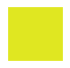

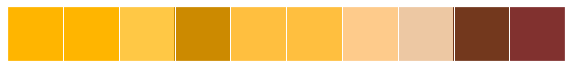

In [108]:
## Method 3 - Checking the L1 distance between the candles

method_3 = l1_dist_recom(candle, col_list)

print('Original - \n', prods_new[col_list][prods_new.product_name==candle].\
    drop_duplicates(subset ="product_name").sort_values\
    (by=['hue', 'saturation', 'lightness']).reset_index(drop=True)) 
sns.palplot(list(map(hex_to_rgb, prods_new.Hex[prods_new.product_name==candle].unique().tolist())))

print('Recommendation')
sns.palplot(list(map(hex_to_rgb, list(_recom_sort(method_3, candle).Hex))))
print(_recom_sort(method_3, candle))

##### There seems to be some mistake in the formula to calculate the distance.

In [90]:
_recom_sort(method_3, 'Toffee Delight')


,product_name,Hex,hue,lightness,saturation,dist
0,Mango Melon Smoothie,FFB500,43.0,50.0,100.0,4.53
1,Magic Melon,FFB500,43.0,50.0,100.0,4.53
2,Sweet Angel,FFC845,42.0,64.0,100.0,4.07
3,Jingle Bells,CC8A00,41.0,40.0,100.0,2.68
4,Soft Sandalwood,FFBF3F,40.0,62.0,100.0,0.72
5,Crispy Popcorn,FFBF3F,40.0,62.0,100.0,0.72
6,Sangria Party,FECB8B,33.0,77.0,98.0,2.51
7,La-la Llama,EDC8A3,30.0,78.0,67.0,1.58
8,Sweet Chocolate,73381D,19.0,28.0,60.0,1.03
9,Gingerbread,81312F,1.0,35.0,47.0,0.04


* Method 1 requires tweaking of the logic, still checking the reason why the logic is skipping all the blues and jumping to yellow colour range.

* I think that I might have made some mistake in the formula for calculating the L1 distance.

## Testing K-Means

In [29]:
prod_col = prods_new[['product_name', 'Hex', 'hue', 'saturation', 'lightness']][~prods_new.hue.isna()].drop_duplicates(['product_name', 'hue', 'saturation', 'lightness']).reset_index(drop=True)
prod_col_1 = prod_col.copy().set_index('product_name')
prod_col

,product_name,Hex,hue,saturation,lightness
0,Cookies & Cream,EFDBB2,40.0,66.0,82.0
1,Creamy Vanilla,EFDBB2,40.0,66.0,82.0
2,Happy Birthday,AF1685,316.0,78.0,39.0
3,Passion Fruit,F3E500,57.0,100.0,48.0
4,Pink Cherry,DA1884,327.0,80.0,47.0
...,...,...,...,...,...
129,Bohemian Chic,EFDBB2,40.0,66.0,82.0
130,You're a Gentleman,505759,193.0,5.0,33.0
131,Owl I Need Is You,9595D2,240.0,40.0,70.0
132,Sparkle and Shine,DC8699,347.0,55.0,69.0


In [35]:
type(prod_col)

pandas.core.frame.DataFrame

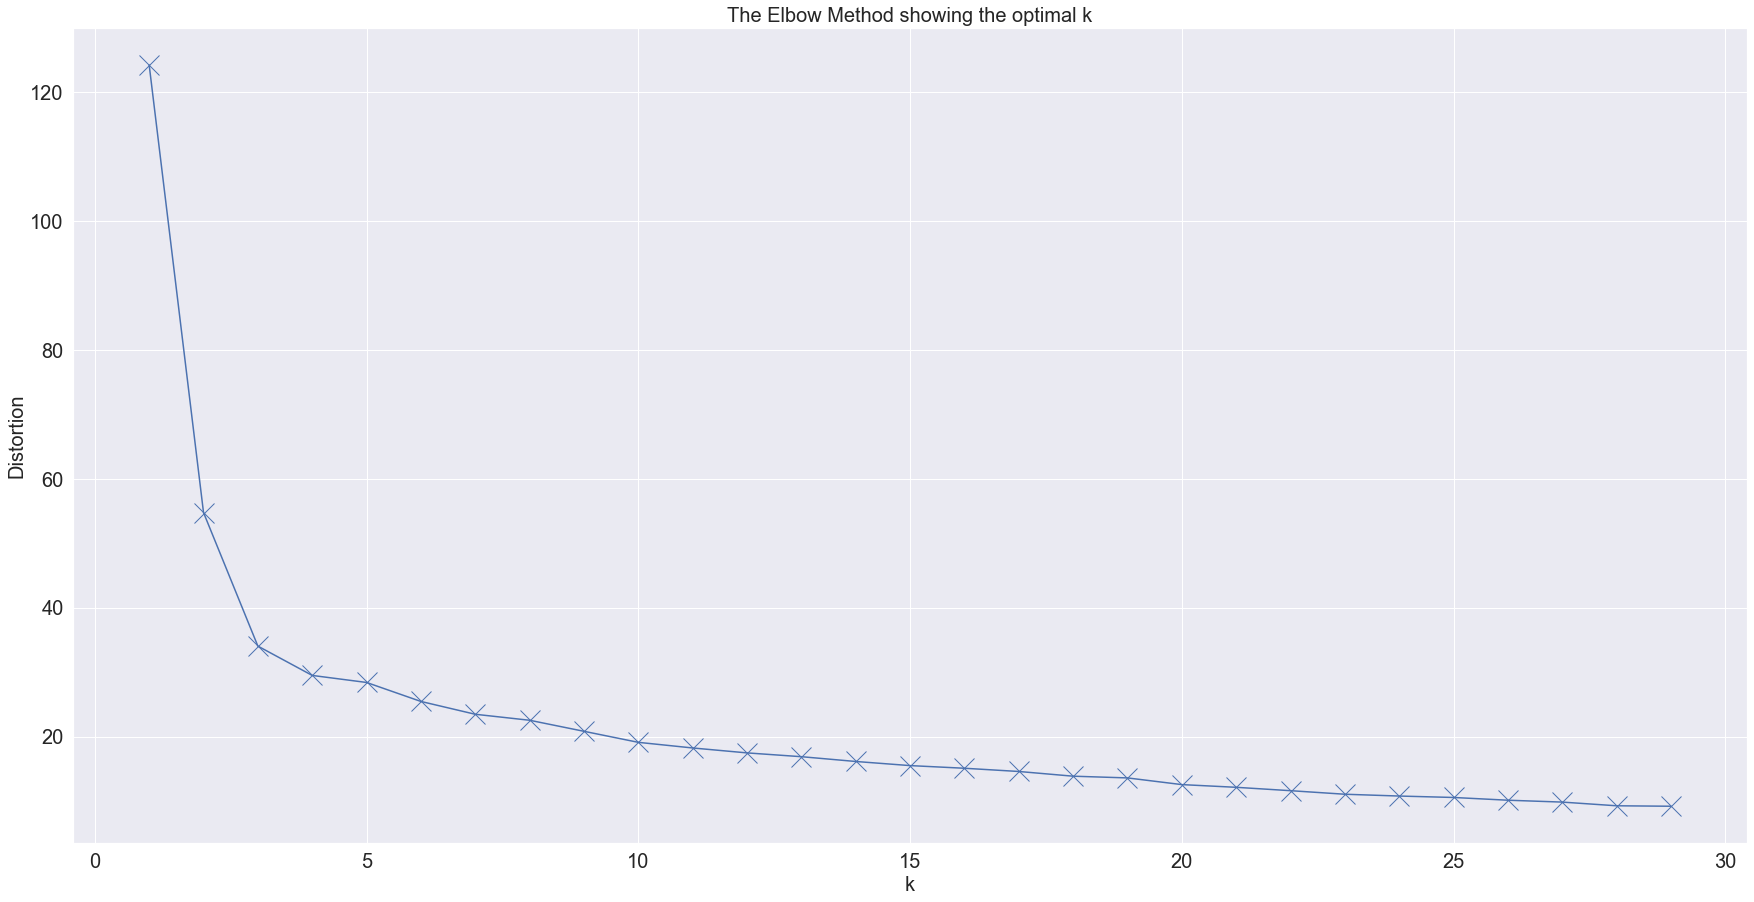

In [27]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


_k_means_fit = prod_col[['hue','saturation','lightness']].values

# k means determine k
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(_k_means_fit)
    kmeanModel.fit(_k_means_fit)
    distortions.append(sum(np.min(cdist(_k_means_fit, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / _k_means_fit.shape[0])

# Plot the elbow
plt.rc('axes', titlesize=20, labelsize=20)
plt.rc('xtick',labelsize=20)
plt.rc('ytick', labelsize=20)

plt.figure(figsize=(20,15))
plt.plot(K, distortions, 'bx-', markersize=20)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [27]:
## function to sort dataframe based on input hue value first

def _recom_sort(df, prod_name):
    lst_hue = list(df.hue)
    lst_hue.sort(key = lambda x: abs(x-int(prod_col.hue[prod_col.product_name==prod_name])))
    df['hue'] = pd.Categorical(
        df['hue'], 
        categories=list(pd.unique(lst_hue)), 
        ordered=True
    )
    df_sorted = df.sort_values(by='hue').reset_index(drop=True)
    return df_sorted

In [29]:
# Assigning groups to products using K-Means

kmeans = KMeans(n_clusters=15, random_state=100).fit(_k_means_fit)
col_group = kmeans.labels_

# Create copy of original dataframe
prod_col_w_grp = prod_col.copy()
# Store generated groups into new column
prod_col_w_grp['group'] = list(col_group)



In [30]:
## Function to produce recommended list of products based on input product name

def _kmeans_recom(prod_name):
    g_value = kmeans.predict(prod_col[['hue','saturation','lightness']][prod_col.product_name==prod_name].values)[0]
    recom_prod = prod_col_w_grp[(prod_col_w_grp.group==g_value) & (prod_col_w_grp.product_name!=prod_name)].reset_index(drop=True)
    return _recom_sort(recom_prod, prod_name)

      product_name     Hex   hue  saturation  lightness  group
30  Toffee Delight  E0E721  62.0        80.0       52.0      1 


           product_name     Hex   hue  saturation  lightness  group
0        Fresh Lemonade  B7BF10  63.0        85.0       41.0      1
1          Happy Summer  E1E000  60.0       100.0       44.0      1
2         Passion Fruit  F3E500  57.0       100.0       48.0      1
3  Mango Melon Smoothie  FFB500  43.0       100.0       50.0      1
4           Magic Melon  FFB500  43.0       100.0       50.0      1
5          Jingle Bells  CC8A00  41.0       100.0       40.0      1


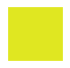

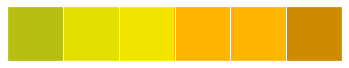

In [91]:
## Testing the function

# prod_name = candle#'Sweetest Reindeer'
prod_name = 'Toffee Delight'

print(prod_col_w_grp[prod_col_w_grp.product_name==prod_name], '\n\n')

print(_kmeans_recom(prod_name))

sns.palplot(list(map(hex_to_rgb, list(prod_col_w_grp.Hex[prod_col_w_grp.product_name==prod_name]))))
sns.palplot(list(map(hex_to_rgb, list(_kmeans_recom(prod_name).Hex))))

#### Testing sorting function

In [126]:
_recom_sort(_kmeans_recom(prod_name)).head()

,product_name,Hex,hue,saturation,lightness,group
0,Cookies & Cream,EFDBB2,40.0,66.0,82.0,3
1,Bohemian Chic,EFDBB2,40.0,66.0,82.0,3
2,Sweet Cupcake,EFDBB2,40.0,66.0,82.0,3
3,Creamy Vanilla (No Glass),EFDBB2,40.0,66.0,82.0,3
4,Cookies & Cream (No Glass),EFDBB2,40.0,66.0,82.0,3


In [127]:
t1 = _kmeans_recom(prod_name)
t1.head()

,product_name,Hex,hue,saturation,lightness,group
0,Cookies & Cream,EFDBB2,40.0,66.0,82.0,3
1,Cozy Winter,EFDBB2,40.0,66.0,82.0,3
2,Pour toujours & męme aprčs,EFDBB2,40.0,66.0,82.0,3
3,Blossom,EFDBB2,40.0,66.0,82.0,3
4,Ice Cream Vanilla,EFDBB2,40.0,66.0,82.0,3


In [115]:
lst_t1 = list(t1.hue)
lst_t1.sort(key = lambda x: abs(x-int(prod_col_w_grp.hue[prod_col_w_grp.product_name==prod_name])))
lst_t1

[40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 32.0,
 50.0,
 30.0,
 50.0,
 29.0,
 17.0,
 82.0]

In [128]:
t1['hue'] = pd.Categorical(
    t1['hue'], 
    categories=list(pd.unique(lst_t1)), 
    ordered=True
)
t1.sort_values(by='hue').reset_index(drop=True).head()

,product_name,Hex,hue,saturation,lightness,group
0,Cookies & Cream,EFDBB2,40.0,66.0,82.0,3
1,Bohemian Chic,EFDBB2,40.0,66.0,82.0,3
2,Sweet Cupcake,EFDBB2,40.0,66.0,82.0,3
3,Creamy Vanilla (No Glass),EFDBB2,40.0,66.0,82.0,3
4,Cookies & Cream (No Glass),EFDBB2,40.0,66.0,82.0,3


In [112]:
t1.sort_values('hue').Hex

0     EFDBB2
13    EFDBB2
12    EFDBB2
11    EFDBB2
10    EFDBB2
7     EFDBB2
8     EFDBB2
1     EFDBB2
6     EFDBB2
16    EFDBB2
5     E6A65D
15    F1E6B2
3     F1E6B2
14    EDC8A3
9     DBC8B6
4     E6BAA8
2     C4D6A4
Name: Hex, dtype: object

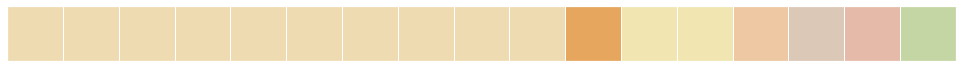

In [113]:
sns.palplot(list(map(hex_to_rgb, list(t1.sort_values('hue').Hex))))

##### End of test

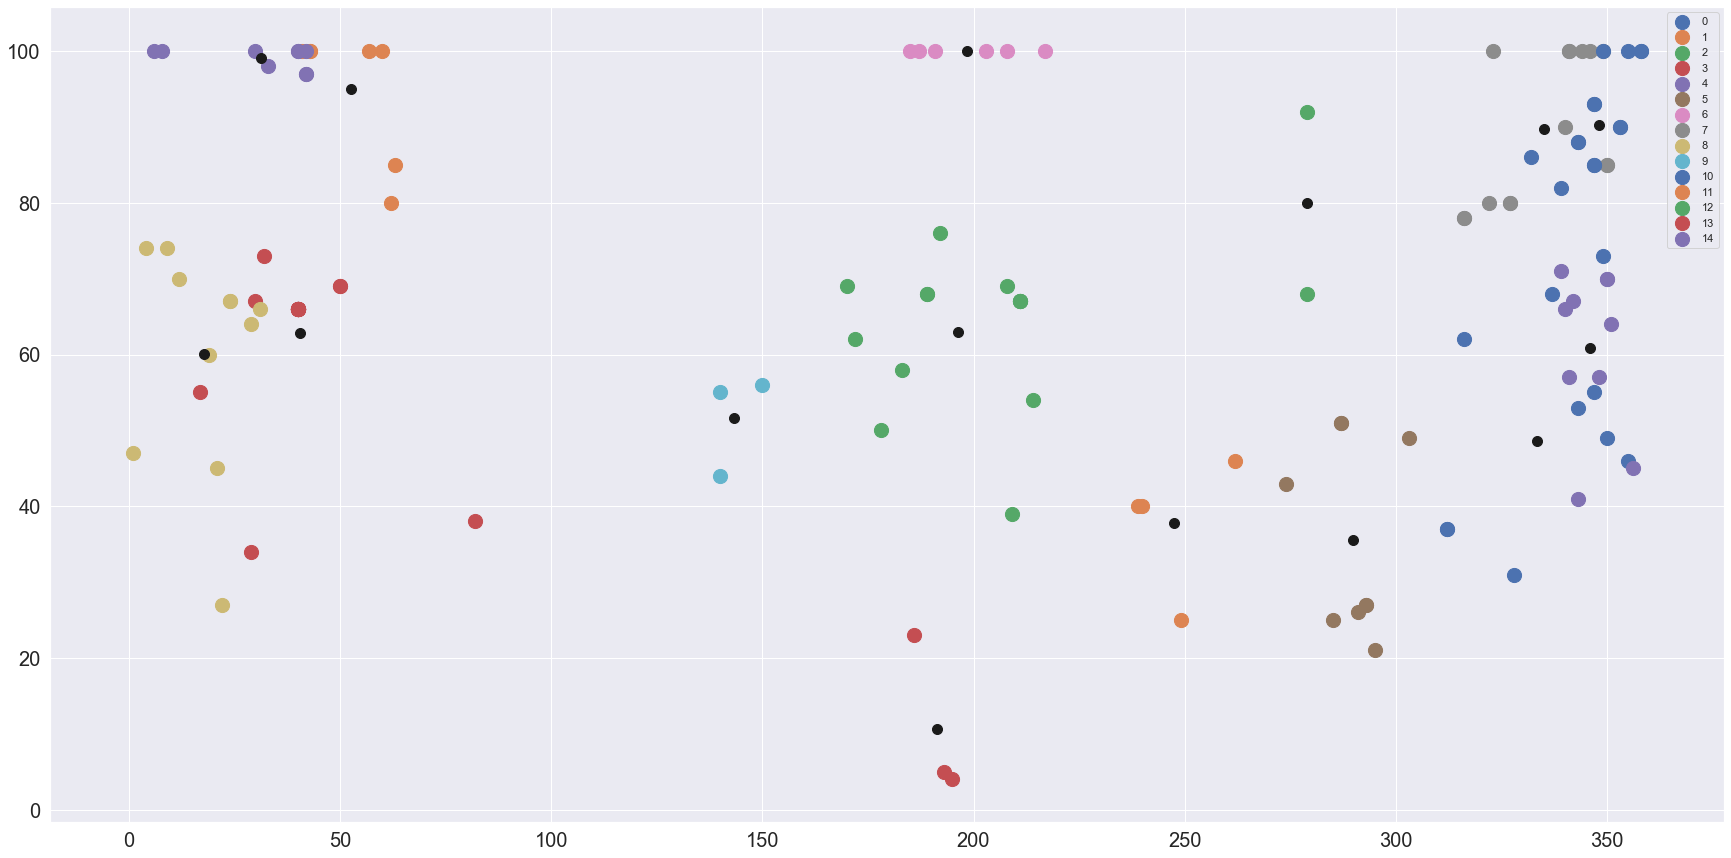

In [125]:
##Plotting the clusters

prod_kmeans = prod_col_w_grp[['hue','saturation','lightness', 'group']]
centroids = kmeans.cluster_centers_
u_labels = np.unique(col_group)
colormap = np.array(['r', 'g', 'b'])

plt.figure(figsize=(30,15))
for i in u_labels:
    plt.scatter(prod_kmeans[col_group == i].iloc[:,0] , prod_kmeans[col_group == i].iloc[:,1], s=200, label =i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

## Testing DBSCAN

https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

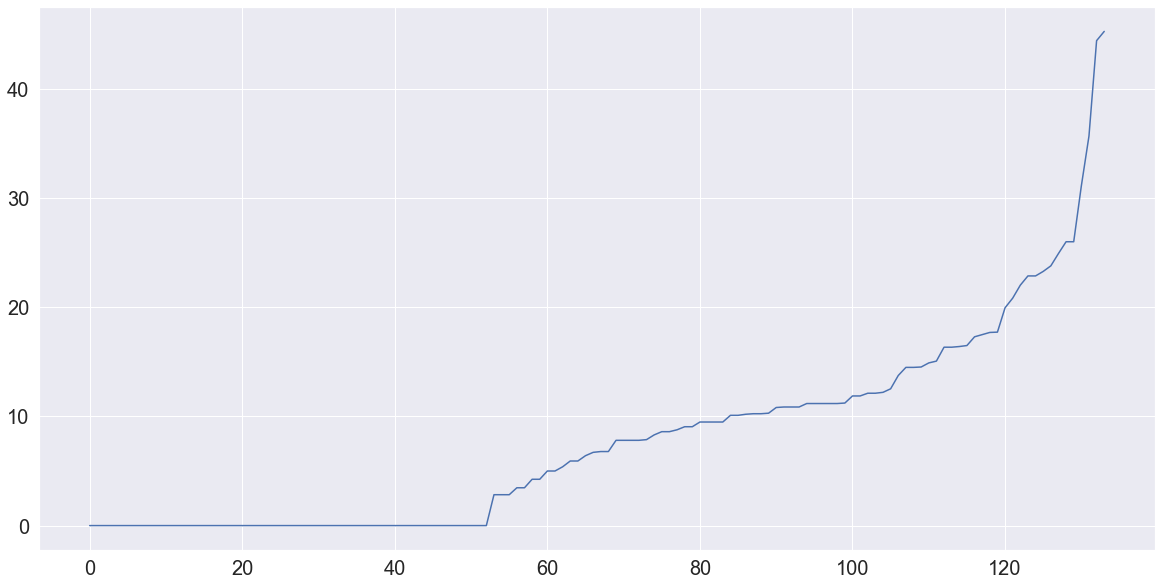

In [32]:
# Import realted packages
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# reduced dataframe for fitting
_dbs_fit = prod_col[['hue','saturation','lightness']].values

# Calculate distances between neighbouring points
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(_dbs_fit)
distances, indices = nbrs.kneighbors(_dbs_fit)

# Plot graph to measure optimal epsilon
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)

In [33]:
## Fit the DBSCAN algorithm to the dataset
clustering = DBSCAN(eps=18, min_samples=2).fit(_dbs_fit)

# Generate the labels for the clusters
col_group_dbs = clustering.labels_

# Create copy of original dataset
prod_col_wdbs_grp = prod_col.copy()

# Append generated labels to the new dataframe 
prod_col_wdbs_grp['group'] = list(col_group_dbs)



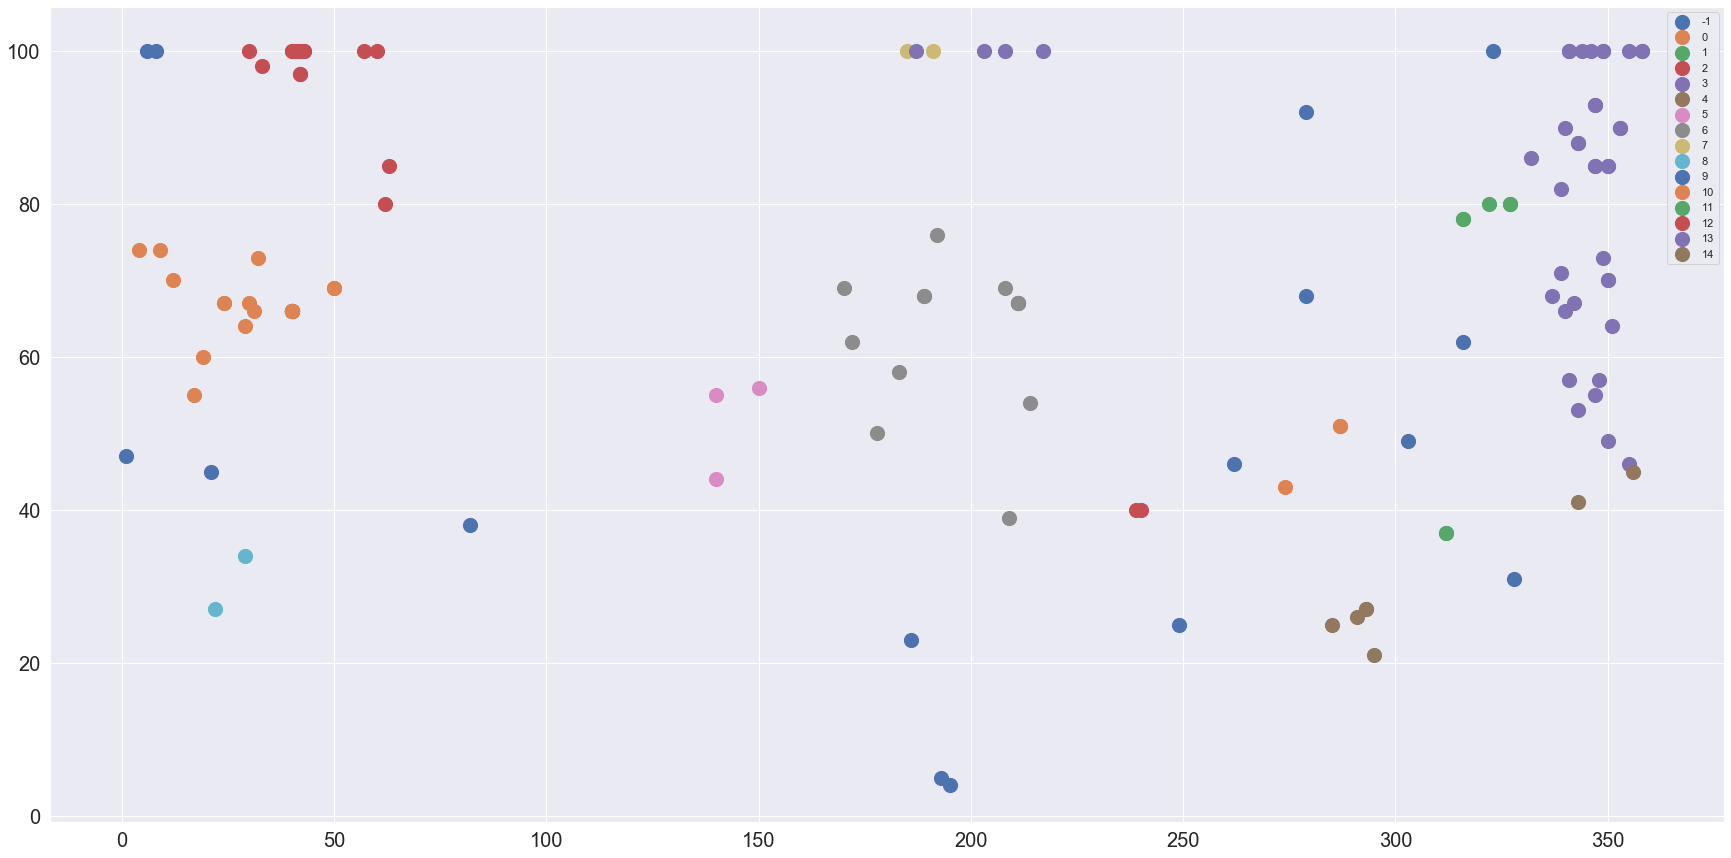

In [34]:
# Plot clusters as per DBSCAN

prod_dbs = prod_col_wdbs_grp[['hue','saturation','lightness', 'group']]
u_labels = np.unique(col_group_dbs)
colormap = np.array(['r', 'g', 'b']) # set the colour pallete of the colours for each group

plt.figure(figsize=(30,15)) # set size of the plot
# plotting the points for each group
for i in u_labels:
    plt.scatter(prod_dbs[col_group_dbs == i].iloc[:,0] , prod_dbs[col_group_dbs == i].iloc[:,1], s=200, label =i)
plt.legend()
plt.show()

In [102]:
def _dbscan_recom(prod_name):
    candle_group = prod_col_wdbs_grp.group[prod_col_wdbs_grp.product_name == candle_name].unique()[0]
    recom_prod = prod_col_wdbs_grp[(prod_col_wdbs_grp.group == candle_group) & (prod_col_wdbs_grp.product_name!=prod_name)].reset_index(drop=True)
    return _recom_sort(recom_prod, prod_name)

      product_name     Hex   hue  saturation  lightness  group
30  Toffee Delight  E0E721  62.0        80.0       52.0      2 


            product_name     Hex   hue  saturation  lightness  group
0         Fresh Lemonade  B7BF10  63.0        85.0       41.0      2
1           Happy Summer  E1E000  60.0       100.0       44.0      2
2          Passion Fruit  F3E500  57.0       100.0       48.0      2
3   Mango Melon Smoothie  FFB500  43.0       100.0       50.0      2
4            Magic Melon  FFB500  43.0       100.0       50.0      2
5            Sweet Angel  FFC845  42.0       100.0       64.0      2
6         Tropical Peach  FDD26E  42.0        97.0       71.0      2
7    You Are My Sunshine  FDD26E  42.0        97.0       71.0      2
8           Jingle Bells  CC8A00  41.0       100.0       40.0      2
9         Crispy Popcorn  FFBF3F  40.0       100.0       62.0      2
10       Soft Sandalwood  FFBF3F  40.0       100.0       62.0      2
11         Sangria Party  FECB8B  33.0     

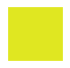

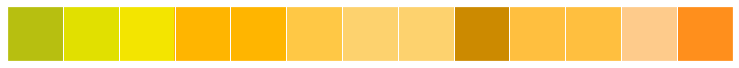

In [103]:
## Testing the function

candle_name = prod_name #'Sweetest Reindeer'
# prod_name = 'Creamy Vanilla'

print(prod_col_wdbs_grp[prod_col_wdbs_grp.product_name==prod_name], '\n\n')

print(_dbscan_recom(candle_name))

sns.palplot(list(map(hex_to_rgb, list(prod_col_wdbs_grp.Hex[prod_col_wdbs_grp.product_name==prod_name]))))
sns.palplot(list(map(hex_to_rgb, list(_dbscan_recom(candle_name).Hex))))

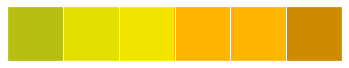

In [106]:
sns.palplot(list(map(hex_to_rgb, list(_kmeans_recom(prod_name).Hex))))

In [104]:
_dbscan_recom(candle_name).product_name

0           Fresh Lemonade
1             Happy Summer
2            Passion Fruit
3     Mango Melon Smoothie
4              Magic Melon
5              Sweet Angel
6           Tropical Peach
7      You Are My Sunshine
8             Jingle Bells
9           Crispy Popcorn
10         Soft Sandalwood
11           Sangria Party
12         Cinnamon Orange
Name: product_name, dtype: object

In [105]:
_kmeans_recom(prod_name)

,product_name,Hex,hue,saturation,lightness,group
0,Fresh Lemonade,B7BF10,63.0,85.0,41.0,1
1,Happy Summer,E1E000,60.0,100.0,44.0,1
2,Passion Fruit,F3E500,57.0,100.0,48.0,1
3,Mango Melon Smoothie,FFB500,43.0,100.0,50.0,1
4,Magic Melon,FFB500,43.0,100.0,50.0,1
5,Jingle Bells,CC8A00,41.0,100.0,40.0,1


## Test to determine the best model

get the points recommended by each algorithm for a particular candle and pass them through the below test.

In [61]:
dbs_rec_df = _dbscan_recom(candle_name)  ## result set from DBSCAN
kms_rec_df = _kmeans_recom(prod_name)  ## result set from K-Means

In [62]:
dbs_np = dbs_rec_df[['hue', 'saturation', 'lightness']].to_numpy()
kms_np = kms_rec_df[['hue', 'saturation', 'lightness']].to_numpy()

In [51]:
# Radius of gyration measure

def gyration_rad(point_dist: np.ndarray):
    centre_mass = np.sum(point_dist, axis=0)/len(point_dist)
    gyr = 0.0
    for i in range(len(point_dist)):
        gyr = gyr + np.sum((point_dist[i, :] - centre_mass)**2)
    return gyr/len(point_dist)

def ball_density(num_points, radius):
    return num_points/(4./3.*np.pi*(radius**3))

In [111]:
gyr_rad = gyration_rad(dbs_np)
gyr_rad = np.sqrt(gyr_rad)
round(ball_density(len(dbs_np), gyr_rad), 5)

0.00064000000000000005

In [115]:
len(dbs_np)

24

In [113]:
gyr_rad = gyration_rad(kms_np)
gyr_rad = np.sqrt(gyr_rad)
round(ball_density(len(kms_np), gyr_rad), 5)

0.00080999999999999996

In [114]:
gyr_rad

17.079500653138361

In [67]:
len(dbs_np)

24

In [70]:
round(ball_density(len(dbs_np), np.sqrt(gyration_rad(dbs_np))), 5) < \
            round(ball_density(len(kms_np), np.sqrt(gyration_rad(kms_np))), 5)

True

https://www.geeksforgeeks.org/dunn-index-and-db-index-cluster-validity-indices-set-1/

In [201]:
from sklearn.metrics import davies_bouldin_score
## lower score is better

In [205]:
from sklearn.metrics import davies_bouldin_score
## lower score is better

print('Testing performance of clustering using DB index score. Lower score is better.')
print('DB Index score for Kmeans - ', davies_bouldin_score(_k_means_fit, col_group))
print('DB Index score for DB Scan - ', davies_bouldin_score(_dbs_fit, col_group_dbs))

Testing performance of clustering using DB index score. Lower score is better.
DB Index score for Kmeans -  0.809796353624
DB Index score for DB Scan -  1.60754573261


1.60754573261


# Smell categorisation

## Word Synsets - 

Wordnet - WordNet is a lexical database of semantic relations between words in more than 200 languages. WordNet links words into semantic relations including synonyms, hyponyms, and meronyms. The synonyms are grouped into synsets with short definitions and usage examples.

Synset -  a synset or synonym set is defined as a set of one or more synonyms that are interchangeable in some context without changing the truth value of the proposition in which they are embedded. 

#### Hypernyms and Hyponyms - 

Nouns

    hypernyms: Y is a hypernym of X if every X is a (kind of) Y (canine is a hypernym of dog)
    hyponyms: Y is a hyponym of X if every Y is a (kind of) X (dog is a hyponym of canine)

Verbs

    hypernym: the verb Y is a hypernym of the verb X if the activity X is a (kind of) Y (to perceive is an hypernym of to listen)
    
    
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Hyponym_and_hypernym.svg/1920px-Hyponym_and_hypernym.svg.png" alt="Euclidean distance formula" style="width: 500px;"/>
    
    
References - 
https://en.wikipedia.org/wiki/WordNet


In [125]:
frag.head()

,smell_code,smell_group,smell_subgroup,smell_head,smell_heart,smell_base
0,AR309941,Oriental,Gourmand,"coconut, almond","gourmande, sweet, chocolate",vanilla
1,AR452415,Floral,Floriental,"hot pink pepper, strawberry and cassis","heady tuberose, jasmine, white lily whilst","Patchouli, vanilla, precious musk"
2,AR289591,Oriental,Floriental,"coconut, milk",Jasmin,"vanilla, caramelized sugar"
3,AL223556,Fresh,Fruity,"Citrus, Orange, Bergamot","Citrus, Green Mango, Sea Salt","Sea Kelp, Floral, Amber"
4,AL223563,Fresh,Flowery,"Lavender, Moss","Sea Minerals, Bergamot","Sandalwood, Amber"


In [104]:
## Create synsets

lemon = wn.synset('lemon.n.01')
citrus = wn.synset('citrus.n.01')
orange = wn.synset('orange.n.01')
tangerine = wn.synset('tangerine.n.01')
clementine = wn.synset('clementine.n.01')

In [105]:
citrus.hyponyms()

[Synset('citrange.n.02'),
 Synset('citron.n.01'),
 Synset('grapefruit.n.02'),
 Synset('kumquat.n.02'),
 Synset('lemon.n.01'),
 Synset('lime.n.06'),
 Synset('mandarin.n.05'),
 Synset('orange.n.01'),
 Synset('pomelo.n.02')]

In [121]:
## Create a synset for a word

w1 = 'citrus'
syntest = wn.synsets(w1)
woi=syntest[0]
print(woi,'\n')
print('Hyponyms for -',w1,'\n' , woi.hyponyms())
print('\n' ,'Hypernyms for -',w1,'\n' , woi.hypernyms())

Synset('citrus.n.01') 

Hyponyms for - citrus 
 [Synset('citrange.n.02'), Synset('citron.n.01'), Synset('grapefruit.n.02'), Synset('kumquat.n.02'), Synset('lemon.n.01'), Synset('lime.n.06'), Synset('mandarin.n.05'), Synset('orange.n.01'), Synset('pomelo.n.02')]

 Hypernyms for - citrus 
 [Synset('edible_fruit.n.01')]


In [133]:
w1 = 'jasmine'
syntest = wn.synsets(w1)
woi=syntest[0]
print(woi,'\n')
print('Hyponyms for -',w1,'\n' , woi.hyponyms())
print('\n' ,'Hypernyms for -',w1,'\n' , woi.hypernyms())

Synset('jasmine.n.01') 

Hyponyms for - jasmine 
 [Synset('arabian_jasmine.n.01'), Synset('common_jasmine.n.01'), Synset('primrose_jasmine.n.01'), Synset('winter_jasmine.n.01')]

 Hypernyms for - jasmine 
 [Synset('shrub.n.01')]


* Hypernyms and Hyponyms can be used to identify the generalised groups of certain words such as Orange, citrus
     
* But, there are words which would have to be directly compared to check, for e.g. Jasmine/jasmin

# Testing and comparing available colour package and user defined function to convert RGB to HSL

In [2]:
!pip install colormath

  Created wheel for colormath: filename=colormath-3.0.0-cp37-none-any.whl size=39394 sha256=6f6b8e101ea23b9c033f766d0c5d367c3ca51ecd82b9082bb97eab41c984a598
  Stored in directory: C:\Users\kurup\AppData\Local\pip\Cache\wheels\20\49\7b\9635bccd6136cc713f623caa85ced89c0c63878f8b2a58fe99
Successfully built colormath


In [3]:
from colormath import color_conversions

In [10]:
from colormath.color_objects import XYZColor, sRGBColor, LabColor
from colormath.color_conversions import convert_color

rgb = sRGBColor(0.1, 0.2, 0.3)
xyz = convert_color(rgb, XYZColor, target_illuminant='d50')
lab = convert_color(xyz, LabColor)

In [13]:
type(lab)

colormath.color_objects.LabColor

In [3]:
colours.head()

,pantone,hex,munsell_hue,munsell_value,munsell_chroma,name
0,7499C,F1E6B2,10Y,9,4,Light Yellow
1,2587C,8246AF,2.5P,4,14,Dark Purple
2,357C,215732,10GY,3,6,Green
3,204C,E782A9,7.5RP,6,10,Light Pink
4,2635C,C5B4E3,2.5P,7,6,Light Purple


In [53]:
prod_col[['product_name', 'hue']][~prod_col.hue.isna()].reset_index()

,index,product_name,hue
0,0,Cookies & Cream,40.0
1,1,Creamy Vanilla,40.0
2,2,Happy Birthday,316.0
3,3,Passion Fruit,57.0
4,4,Pink Cherry,327.0
...,...,...,...
129,230,Bohemian Chic,40.0
130,231,You're a Gentleman,193.0
131,232,Owl I Need Is You,240.0
132,237,Sparkle and Shine,347.0


In [68]:
# pd.DataFrame(prod_col.corrwith(prod_col, axis = 1)).to_csv('prod_col.csv')

In [152]:
# Function to convert hex values to RGB values

def hex_to_rgb_1(hex_value):
    h = str(hex_value).lstrip('#')
    return tuple(int(h[i:i + 2], 16) for i in (0, 2, 4))

In [155]:
# Function to convert RGB values to HSL values

def rgb_to_hsl_1(r, g, b):
    r = float(r)
    g = float(g)
    b = float(b)
    high = max(r, g, b)
    low = min(r, g, b)
    h, s, l = ((high + low) / 2,)*3

    if high == low:
        h = 0.0
        s = 0.0
    else:
        l = (high + low) / 2
        d = high - low
        s = d / (2 - high - low) if l > 0.5 else d / (high + low)
        h = {
            r: (g - b) / d + (6 if g < b else 0),
            g: (b - r) / d + 2,
            b: (r - g) / d + 4,
        }[high]
        h /= 6
#round(h*360), round(s*100), round(l*100)
    return h,s,l

In [156]:
# Define hex value to convert

_hex = '123450'
hex_to_rgb_1(_hex)

(18, 52, 80)

In [154]:
import colorsys

colorsys.rgb_to_hsv(hex_to_rgb(_hex)[0], hex_to_rgb(_hex)[1], hex_to_rgb(_hex)[2])

(0.575268817204301, 0.775, 0.3137254901960784)

In [157]:
# H L S format using colorsys package

colorsys_convert = colorsys.rgb_to_hls(hex_to_rgb(_hex)[0], hex_to_rgb(_hex)[1], hex_to_rgb(_hex)[2])
print('H - ',round(colorsys_convert[0]*360),  '\nS - ',round(colorsys_convert[2]*100),  '\nL - ',round(colorsys_convert[1]*100))

H -  207 
S -  63 
L -  19


In [171]:
# H S L format using user defind function

func_convert = rgb_to_hsl_1(hex_to_rgb(_hex)[0], hex_to_rgb(_hex)[1], hex_to_rgb(_hex)[2])
print('H - ',round(func_convert[0]*360),  '\nS - ',round(func_convert[1]*100),  '\nL - ',round(func_convert[2]*100))

H -  207 
S -  63 
L -  19


source - https://www.w3schools.com/colors/colors_converter.asp


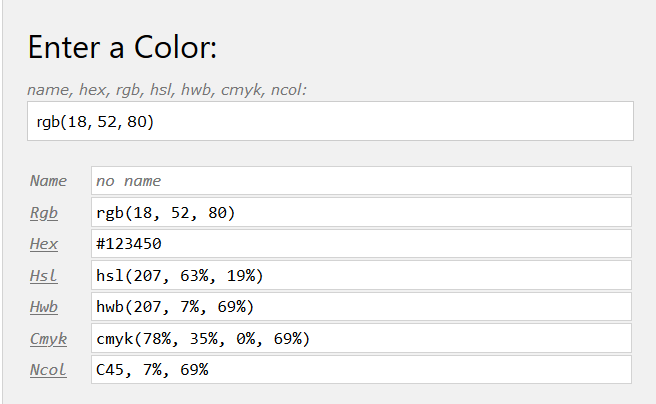

